In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imutils import paths
from PIL import Image
import cv2
import os
from TiffImageDataset import TiffImageDataset
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from torch.utils.data import DataLoader
from new_train_res2_unet import train, pretrained_train
from new_res2_unet import Res2_UNet, Bottle2neck


C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
"""
BASE_DRIVE_PATH = "./drive/MyDrive/dataset"

TRAIN_IMAGES_IMPROVED_DATASET_PATH = (
    BASE_DRIVE_PATH + "/SatelliteImagesImproved/128x128_trainImage"
)

TEST_IMAGES_IMPROVED_DATASET_PATH = (
    BASE_DRIVE_PATH + "/SatelliteImagesImproved/128x128_testImage"
)

TRAIN_IMAGES_ORIGINAL_DATASET_PATH = (
    BASE_DRIVE_PATH + "/OriginalSatelliteImages/128x128_trainImage"
)
TEST_IMAGES_ORIGINAL_DATASET_PATH = (
    BASE_DRIVE_PATH + "/OriginalSatelliteImages/128x128_testImage"
)

TRAIN_MASKS_DATASET_PATH = BASE_DRIVE_PATH + "/Mask/128x128_trainGT"
TEST_MASKS_DATASET_PATH = BASE_DRIVE_PATH + "/Mask/128x128_GT"
"""

TRAIN_IMAGES_IMPROVED_DATASET_PATH = (
    "../dataset/SatelliteImagesImproved/128x128_trainImage"
)
TEST_IMAGES_IMPROVED_DATASET_PATH = (
    "../dataset/SatelliteImagesImproved/128x128_testImage"
)

TRAIN_IMAGES_ORIGINAL_DATASET_PATH = (
    "../dataset/OriginalSatelliteImages/128x128_trainImage"
)
TEST_IMAGES_ORIGINAL_DATASET_PATH = (
    "../dataset/OriginalSatelliteImages/128x128_testImage"
)

TRAIN_MASKS_DATASET_PATH = "../dataset/Mask/128x128_trainGT"
TEST_MASKS_DATASET_PATH = "../dataset/Mask/128x128_GT"

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
PIN_MEMORY = True if DEVICE == "cuda" else False


In [3]:
# trainImagePaths = sorted(list(paths.list_images(TRAIN_IMAGES_IMPROVED_DATASET_PATH)))
trainImagePaths = sorted(list(paths.list_images(TRAIN_IMAGES_IMPROVED_DATASET_PATH)))
trainMaskPaths = sorted(list(paths.list_images(TRAIN_MASKS_DATASET_PATH)))

# testImagePaths = sorted(list(paths.list_images(TEST_IMAGES_IMPROVED_DATASET_PATH)))
testImagePaths = sorted(list(paths.list_images(TEST_IMAGES_IMPROVED_DATASET_PATH)))
testMaskPaths = sorted(list(paths.list_images(TEST_MASKS_DATASET_PATH)))


In [4]:
trainDS = TiffImageDataset(
    imagePaths=trainImagePaths[:2644], masksPaths=trainMaskPaths[:2644]
)
validationDS = TiffImageDataset(
    imagePaths=trainImagePaths[2644:], masksPaths=trainMaskPaths[2644:]
)
testDS = TiffImageDataset(imagePaths=testImagePaths, masksPaths=testMaskPaths)


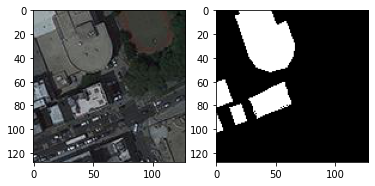

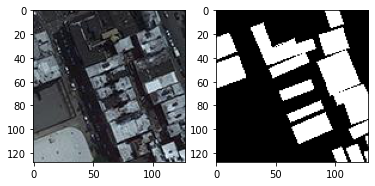

In [5]:
for _ in range(2):
    image, mask = validationDS.__getitem__(_)
    # plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image.permute(1, 2, 0))

    plt.subplot(1, 2, 2)
    plt.imshow(mask.permute(1, 2, 0), cmap="gray")

    plt.show()


In [5]:
trainLoader = DataLoader(
    trainDS,
    # shuffle=True,
    batch_size=8,
    pin_memory=True,
    num_workers=2,
)

validationLoader = DataLoader(
    validationDS,
    # shuffle=True,
    batch_size=8,
    pin_memory=True,
    num_workers=2,
)
# TEST DATA LOADER
testLoader = DataLoader(
    testDS,
    # shuffle=True,
    batch_size=8,
    pin_memory=True,
    num_workers=2,
)


In [ ]:
trained_model = train(
    train_dataloader=trainLoader,
    eval_dataloader=validationLoader,
    show_visuals=True,
    epo_num=20,
)


Epoch: 49. Train.      Loss: 1.002: 100%|██████████| 331/331 [02:57<00:00,  1.87it/s]
Epoch: 49. Eval.      Loss: 1.221: 100%|██████████| 38/38 [00:07<00:00,  5.09it/s]
epoch train loss = 1.001837, epoch test loss = 1.220774, Time 00:03:05

Best validation loss: 1.2207736874881543

Saving best model for epoch: 50



Epoch: 50. Train.      Loss: 0.998: 100%|██████████| 331/331 [02:59<00:00,  1.85it/s]
Epoch: 50. Eval.      Loss: 1.222: 100%|██████████| 38/38 [00:07<00:00,  4.98it/s]
epoch train loss = 0.998414, epoch test loss = 1.221576, Time 00:03:09

In [7]:
from new_train_res2_unet import pretrained_train

In [6]:
pretrained_dict = torch.load("./outputs/improved_40_res2unet_best_model.pth")
pretrained_dict['epoch']

20

epoch: 20, val loss: 0.5663511557014365

epoch: 40, val loss: 0.43594720449886826


start training....


331it [07:55,  1.44s/it]
38it [00:16,  2.32it/s]


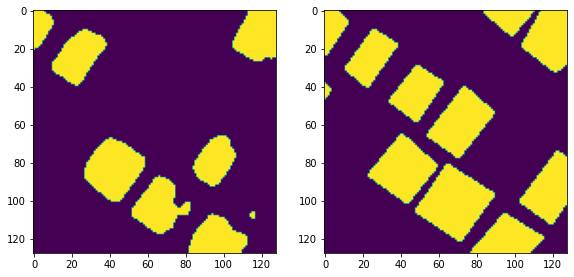

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 1.000000 train loss = 0.509463, epoch test loss = 1.151640, Time 00:08:17


331it [04:52,  1.13it/s]
38it [00:17,  2.17it/s]


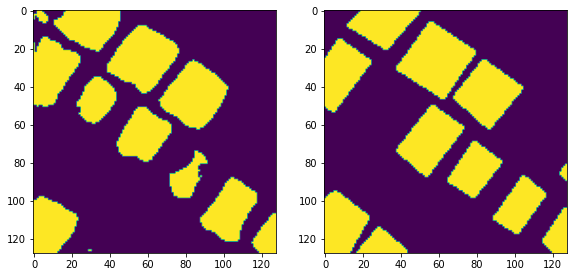

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 2.000000 train loss = 0.500434, epoch test loss = 1.238099, Time 00:05:19


331it [05:03,  1.09it/s]
38it [00:16,  2.36it/s]


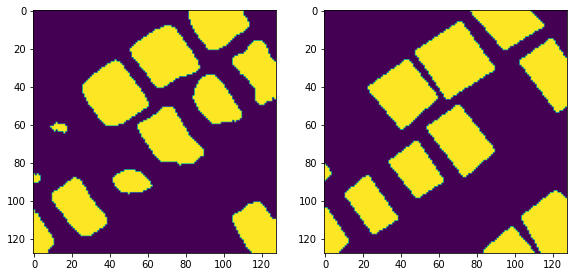

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 3.000000 train loss = 0.487490, epoch test loss = 1.391838, Time 00:05:25


331it [06:01,  1.09s/it]
38it [00:16,  2.36it/s]


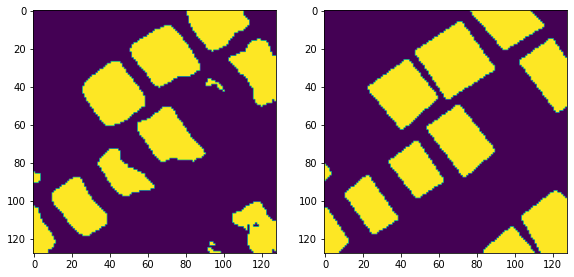

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 4.000000 train loss = 0.478071, epoch test loss = 1.580046, Time 00:06:21


331it [07:29,  1.36s/it]
38it [00:17,  2.23it/s]


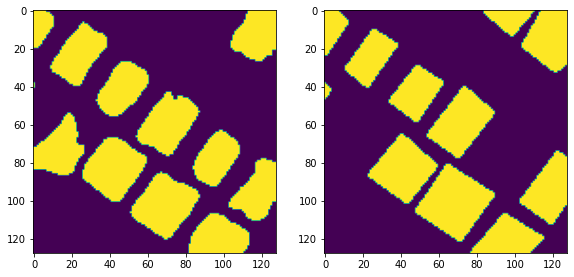

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 5.000000 train loss = 0.471060, epoch test loss = 1.278412, Time 00:07:51


331it [07:23,  1.34s/it]
38it [00:16,  2.32it/s]


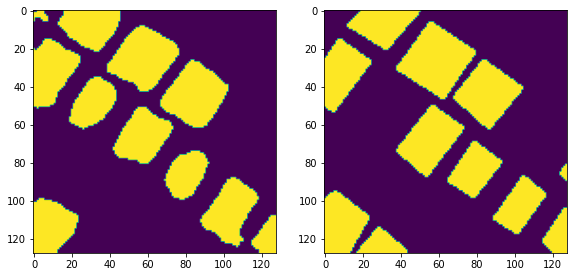

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 6.000000 train loss = 0.464513, epoch test loss = 1.352230, Time 00:07:44


331it [07:27,  1.35s/it]
38it [00:16,  2.35it/s]


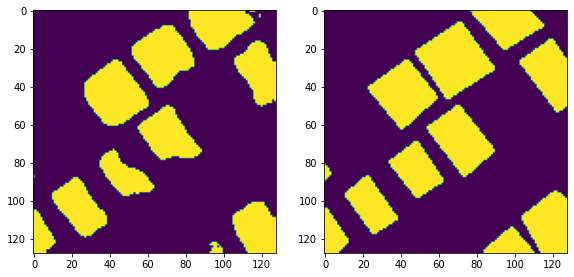

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 7.000000 train loss = 0.462116, epoch test loss = 1.367288, Time 00:07:47


331it [07:27,  1.35s/it]
38it [00:16,  2.29it/s]


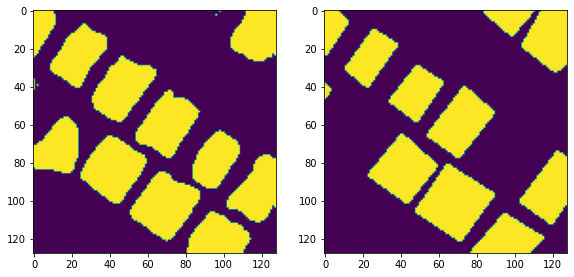

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 8.000000 train loss = 0.464166, epoch test loss = 1.312498, Time 00:07:48


331it [07:30,  1.36s/it]
38it [00:16,  2.30it/s]


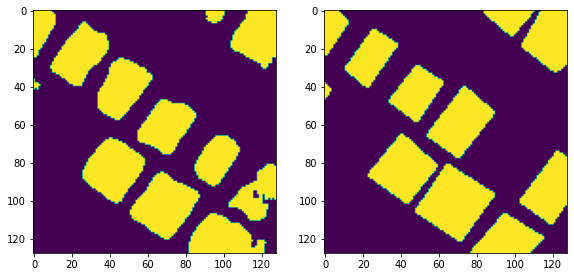

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 9.000000 train loss = 0.448304, epoch test loss = 1.302548, Time 00:07:58


331it [07:20,  1.33s/it]
38it [00:16,  2.33it/s]


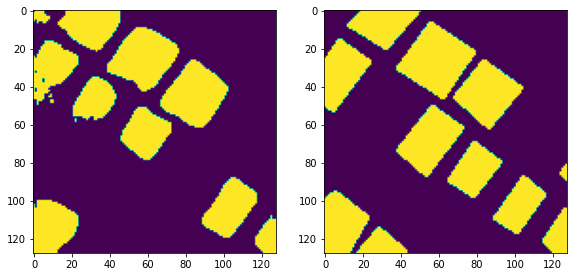

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 10.000000 train loss = 0.447623, epoch test loss = 1.625247, Time 00:07:41


331it [07:28,  1.36s/it]
38it [00:16,  2.35it/s]


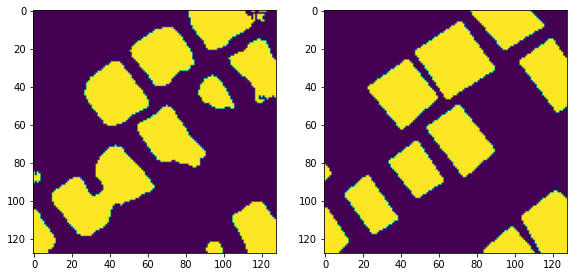

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 11.000000 train loss = 0.438557, epoch test loss = 1.848150, Time 00:07:49


331it [07:27,  1.35s/it]
38it [00:16,  2.34it/s]


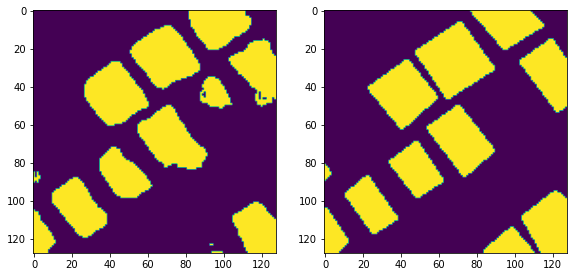

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 12.000000 train loss = 0.431150, epoch test loss = 1.427509, Time 00:07:47


331it [07:18,  1.32s/it]
38it [00:17,  2.22it/s]


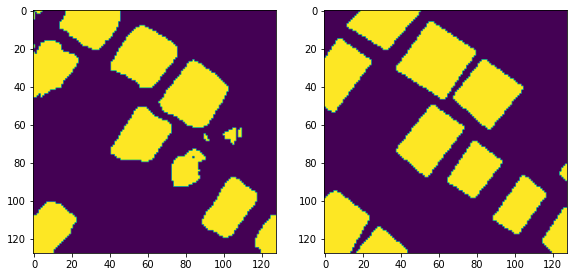

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 13.000000 train loss = 0.418186, epoch test loss = 1.493168, Time 00:07:40


331it [04:03,  1.36it/s]
38it [00:07,  5.07it/s]


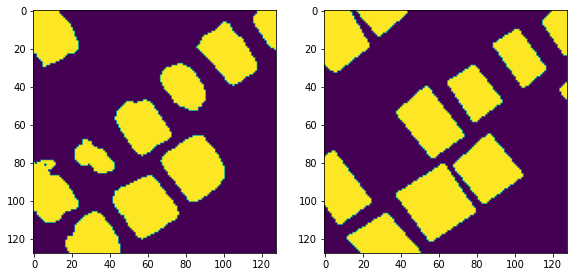

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 14.000000 train loss = 0.418335, epoch test loss = 1.480080, Time 00:04:15


331it [07:04,  1.28s/it]
38it [00:16,  2.36it/s]


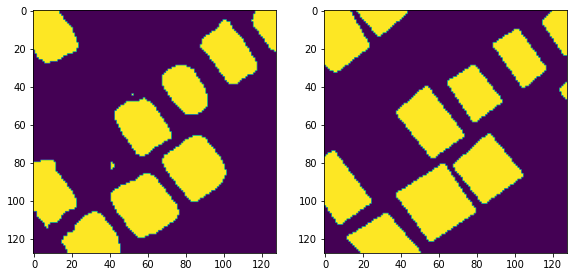

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 15.000000 train loss = 0.417057, epoch test loss = 1.431624, Time 00:07:24


331it [07:23,  1.34s/it]
38it [00:16,  2.29it/s]


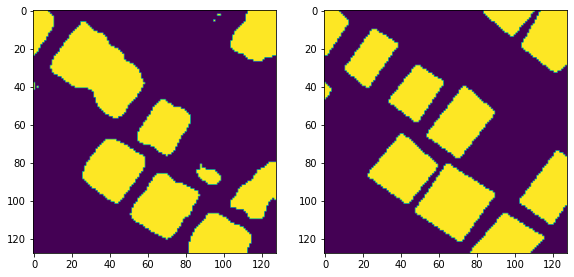

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 16.000000 train loss = 0.410816, epoch test loss = 1.313195, Time 00:07:43


331it [07:22,  1.34s/it]
38it [00:16,  2.24it/s]


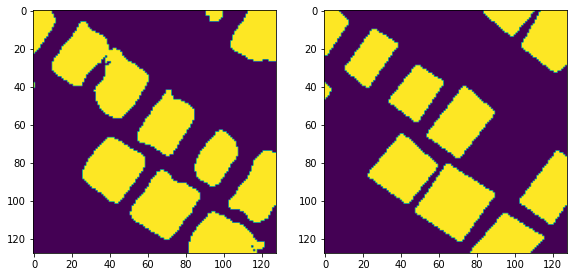

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 17.000000 train loss = 0.415811, epoch test loss = 1.460606, Time 00:07:42


331it [05:10,  1.07it/s]
38it [00:09,  3.80it/s]


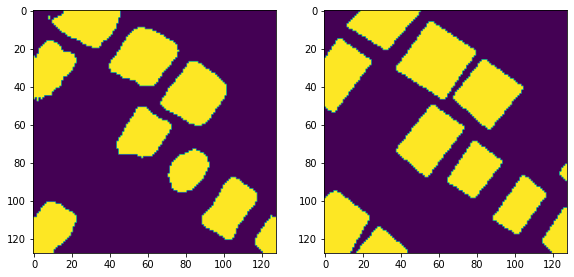

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 18.000000 train loss = 0.399031, epoch test loss = 1.662738, Time 00:05:24


331it [03:20,  1.65it/s]
38it [00:05,  6.74it/s]


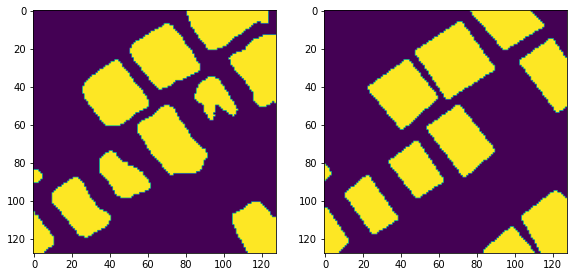

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 19.000000 train loss = 0.392950, epoch test loss = 1.864837, Time 00:03:30


331it [05:07,  1.08it/s]
38it [00:07,  5.21it/s]


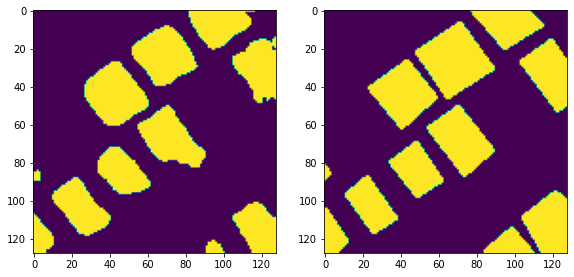

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 20.000000 train loss = 0.418195, epoch test loss = 1.367505, Time 00:05:19
Saving final model...


In [8]:
new_trained_model = pretrained_train(
    train_dataloader=trainLoader,
    eval_dataloader=validationLoader,
    pretrained_dict=pretrained_dict,
    last_eval_loss=0.43594720449886826,
    show_visuals=True,
    epo_num=20,
)


### **71 validation loss**: 1.1276644946713197
### **71 train loss**: 0.540610

epoch: 99 min train loss = 0.392950 epoch test loss = 1.864837
<br/>
epoch: 100 train loss = 0.418195, epoch test loss = 1.367505

start training....


331it [03:32,  1.56it/s]
38it [00:08,  4.50it/s]


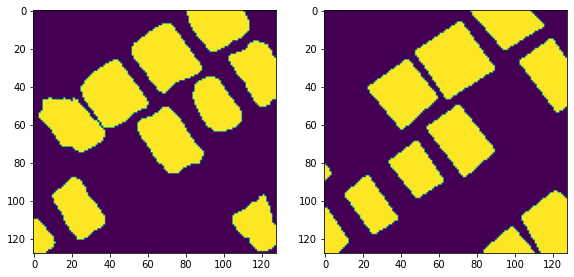

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 1.000000 train loss = 0.247671, epoch test loss = 0.544606, Time 00:03:47


331it [03:26,  1.60it/s]
38it [00:10,  3.76it/s]


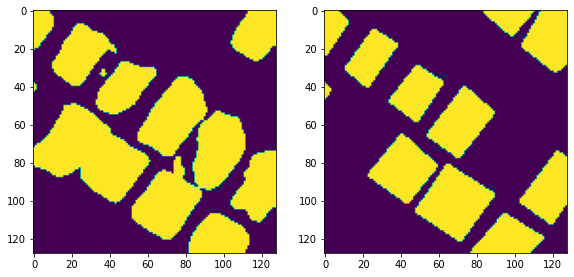

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 2.000000 train loss = 0.245560, epoch test loss = 0.691282, Time 00:03:43


331it [02:46,  1.99it/s]
38it [00:05,  7.14it/s]


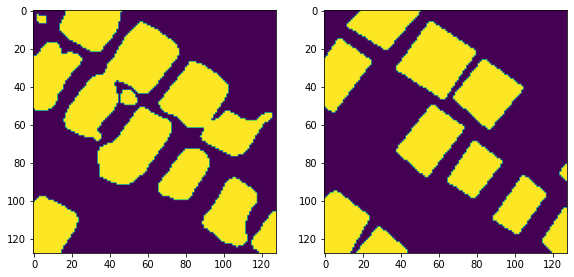

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 3.000000 train loss = 0.244557, epoch test loss = 0.545231, Time 00:02:57


331it [02:28,  2.23it/s]
38it [00:05,  6.89it/s]


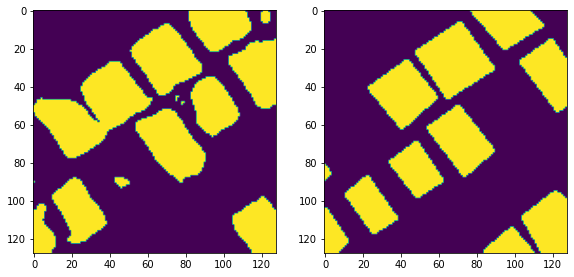

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 4.000000 train loss = 0.241388, epoch test loss = 0.547941, Time 00:02:38


331it [02:32,  2.18it/s]
38it [00:05,  6.79it/s]


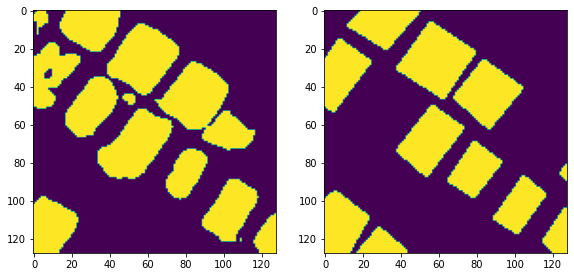

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 5.000000 train loss = 0.240007, epoch test loss = 0.604707, Time 00:02:42


331it [02:34,  2.14it/s]
38it [00:05,  6.81it/s]


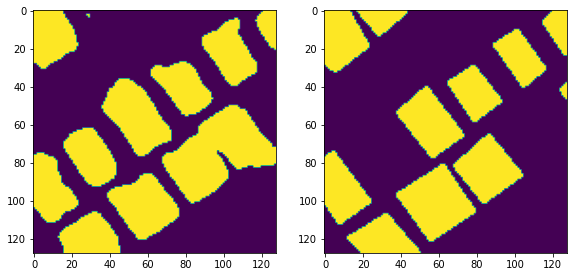

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 6.000000 train loss = 0.235290, epoch test loss = 0.658902, Time 00:02:45


331it [02:37,  2.11it/s]
38it [00:05,  6.66it/s]


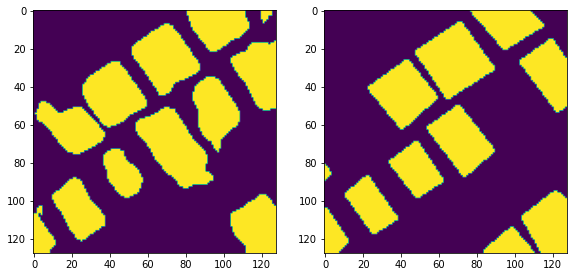

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 7.000000 train loss = 0.231677, epoch test loss = 0.549358, Time 00:02:47


331it [02:40,  2.06it/s]
38it [00:05,  6.41it/s]


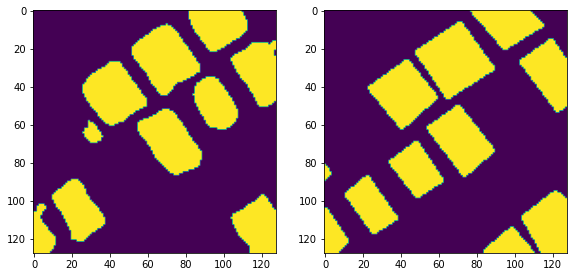

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 8.000000 train loss = 0.230083, epoch test loss = 0.448399, Time 00:02:51


331it [02:36,  2.12it/s]
38it [00:05,  6.74it/s]


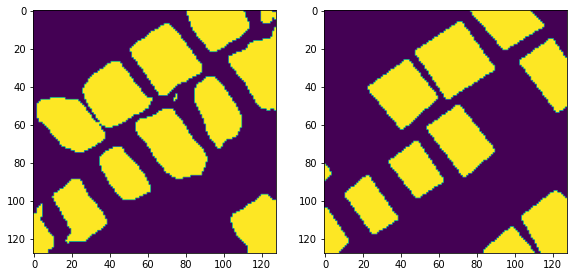

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 9.000000 train loss = 0.233589, epoch test loss = 0.524619, Time 00:02:48


331it [02:37,  2.10it/s]
38it [00:05,  6.71it/s]


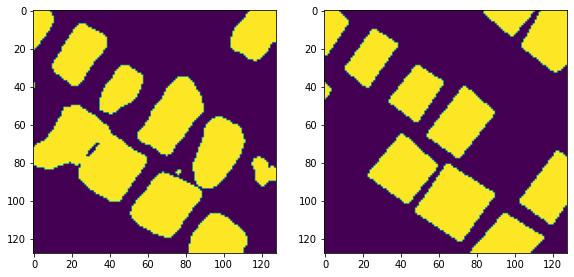

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 10.000000 train loss = 0.228803, epoch test loss = 0.510904, Time 00:02:47


331it [02:38,  2.09it/s]
38it [00:05,  6.59it/s]


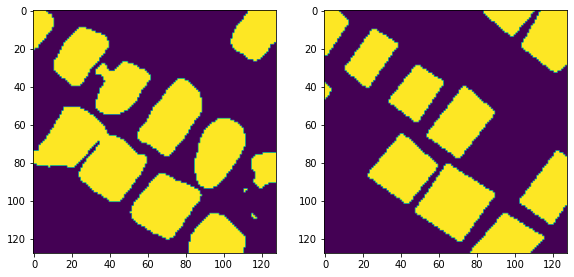

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 11.000000 train loss = 0.225219, epoch test loss = 0.529323, Time 00:02:48


331it [02:38,  2.08it/s]
38it [00:05,  6.78it/s]


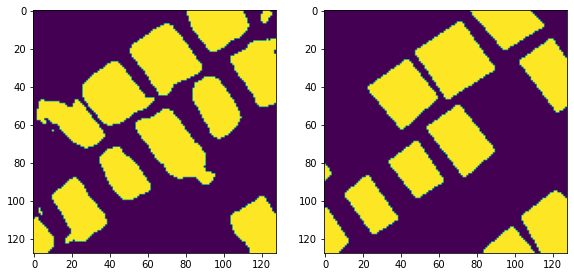

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 12.000000 train loss = 0.221316, epoch test loss = 0.529766, Time 00:02:49


331it [02:38,  2.09it/s]
38it [00:05,  6.64it/s]


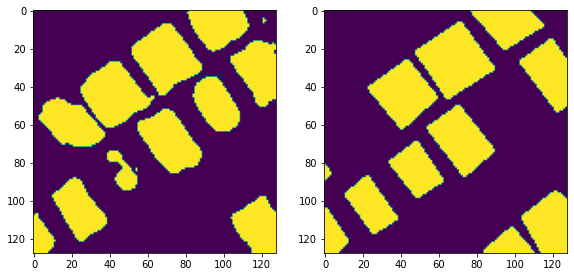

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 13.000000 train loss = 0.217887, epoch test loss = 0.577058, Time 00:02:48


331it [02:38,  2.08it/s]
38it [00:05,  6.73it/s]


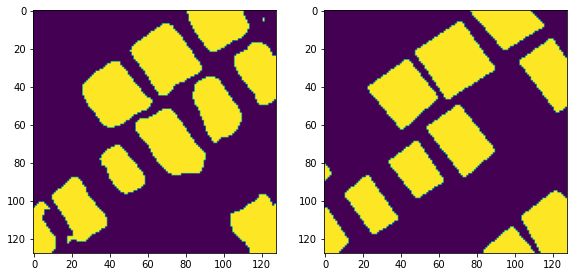

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 14.000000 train loss = 0.228437, epoch test loss = 0.482579, Time 00:02:48


331it [02:38,  2.09it/s]
38it [00:05,  6.68it/s]


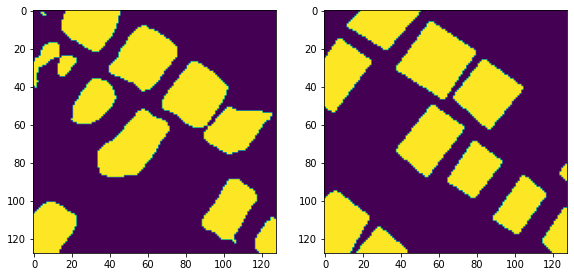

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 15.000000 train loss = 0.218929, epoch test loss = 0.488226, Time 00:02:48


331it [02:39,  2.08it/s]
38it [00:05,  6.60it/s]


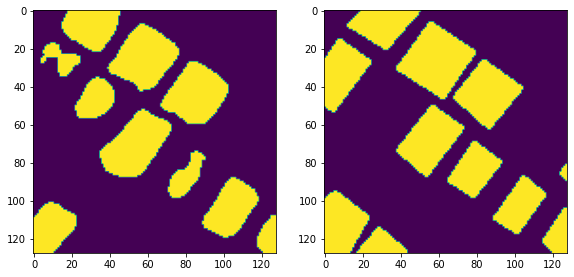

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 16.000000 train loss = 0.218875, epoch test loss = 0.545325, Time 00:02:49


331it [02:42,  2.04it/s]
38it [00:07,  5.01it/s]


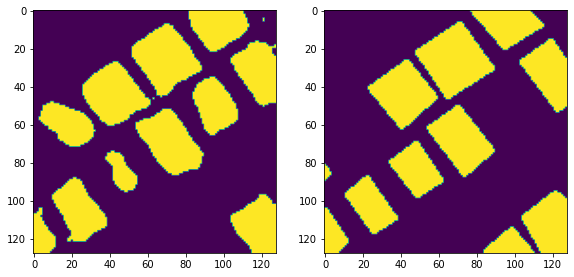

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 17.000000 train loss = 0.213916, epoch test loss = 0.487728, Time 00:02:55


331it [03:22,  1.63it/s]
38it [00:07,  5.08it/s]


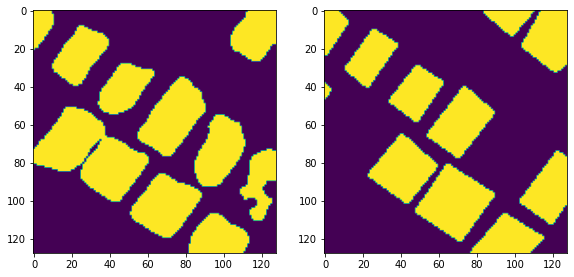

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 18.000000 train loss = 0.213112, epoch test loss = 0.513810, Time 00:03:36


331it [03:03,  1.81it/s]
38it [00:07,  5.16it/s]


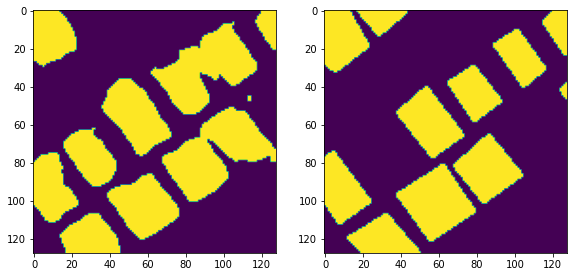

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 19.000000 train loss = 0.211458, epoch test loss = 0.519679, Time 00:03:16


331it [03:12,  1.72it/s]
38it [00:07,  4.94it/s]


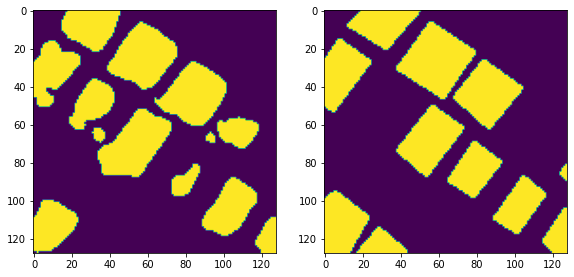

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
epoch: 20.000000 train loss = 0.223456, epoch test loss = 0.518439, Time 00:03:26
Saving final model...


In [9]:
new_trained_model = pretrained_train(
    train_dataloader=trainLoader,
    eval_dataloader=validationLoader,
    pretrained_dict=pretrained_dict,
    last_eval_loss=0.43594720449886826,
    show_visuals=True,
    epo_num=20,
)


In [7]:
test_masks_list = []
test_images_list = []
test_count = len(testDS.masksPaths)

# add test images and masks into respective lists
for i in range(test_count):
    image, mask = testDS.__getitem__(i)
    test_masks_list.append(mask.int().detach().numpy())
    test_images_list.append(image.detach().numpy())

# Generate np.array and torch.tensor from those lists
test_masks_np = np.array(test_masks_list)
test_masks_np = test_masks_np.astype("int8")

test_images_np = np.array(test_images_list)

test_images_torch = torch.from_numpy(test_images_np).cuda()
test_masks_torch = torch.from_numpy(test_masks_np).cuda()

In [48]:
def retrieve_saved_model():
    model = Res2_UNet(Bottle2neck, [3, 4, 6, 3], baseWidth=26, scale=4)
    # pretrained_dict = torch.load("../res2unet_best_model.pth")
    pretrained_dict = torch.load("./outputs/improved_40_res2unet_best_model.pth")
    print(pretrained_dict['epoch'])
    # pretrained_dict = torch.load("./outputs/res2unet_best_model.pth")
    net_dict = model.state_dict()
    ### pretrained_dict = {k: v for k, v in pretrained_dict.items() if (k in net_dict)}

    pretrained_dict = {
        # k: v for k, v in pretrained_dict.model_state_dict().items() if (k in net_dict)
        k: v
        for k, v in pretrained_dict["model_state_dict"].items()
        if (k in net_dict)
    }

    # print(pretrained_dict)
    net_dict.update(pretrained_dict)
    model.load_state_dict(net_dict)
    model.eval()
    return model


In [49]:
saved_model = retrieve_saved_model()

20


In [50]:
test_pred_list = []
with torch.no_grad():
    for test_image in test_images_torch:
        test_image = test_image.unsqueeze(0).cpu()
        output = saved_model(test_image)
        # output = trained_model(test_image)
        output = torch.sigmoid(output)
        test_pred_list.append(output[0])

# convert into numpy array
test_pred_np = np.array([t.cpu().numpy() for t in test_pred_list])

# flattened into single dimension array
flattened_pred = test_pred_np.flatten()
flattened_masks = test_masks_np.flatten()


In [51]:
# pred_label = np.transpose(test_pred_np[10],(1,2,0))

# plt.subplot(1,2,1)
# plt.imshow(pred_label)
# # plt.show()

# plt.subplot(1,2,2)
# plt.imshow(pred_label > 0.5)
# plt.show()


def visualise_model_pred(index):
    image, mask = testDS.__getitem__(index)
    image = image.unsqueeze(0).cpu()

    pred = saved_model(image)
    pred = torch.sigmoid(pred)

    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image[0].permute(1, 2, 0))

    plt.subplot(1, 3, 2)
    plt.imshow(mask.permute(1, 2, 0)[:, :, 0])

    plt.subplot(1, 3, 3)
    plt.imshow(pred[0].permute(1, 2, 0).detach().numpy() > 0.5)
    plt.show()


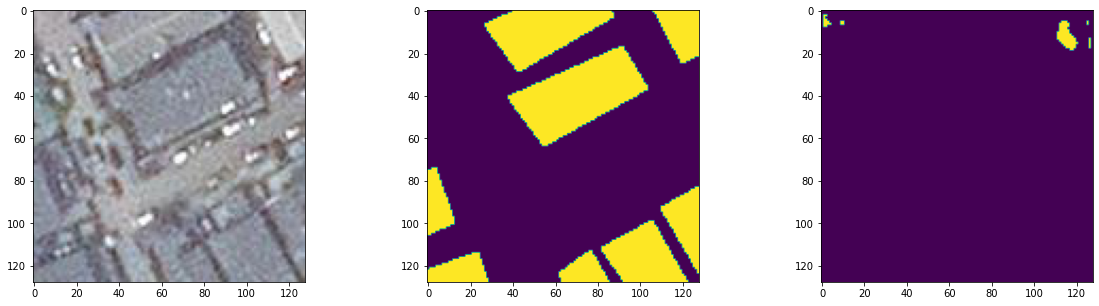

In [56]:
visualise_model_pred(10)

In [57]:
def IoU(threshold, Yi, y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    # print("Nclass = ",Nclass)
    for c in range(Nclass):
        TP = np.sum((Yi == c) & (y_predi == c))
        FP = np.sum((Yi != c) & (y_predi == c))
        FN = np.sum((Yi == c) & (y_predi != c))
        IoU = TP / float(TP + FP + FN)
        # print(
        #     "class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(
        #         c, TP, FP, FN, IoU
        #     )
        # )
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    # print("Threshold=", threshold)
    # print(mIoU)
    return mIoU
    # print("Mean IoU: {:4.3f}".format(mIoU))


In [54]:
from tqdm import tqdm

ious = []
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

for i in tqdm(np.arange(0.10, 1.0, 0.01)):
    preds_val_t = (flattened_pred > i).astype(np.uint8)
    preds_val_tt = preds_val_t.flatten()
    iou_val = IoU(i, flattened_masks, preds_val_tt)
    ious.append(iou_val)

    # f1_score_val = f1_score(flattened_masks, preds_val_tt)
    # f1_scores.append(f1_score_val)

    accuracy_score_val = accuracy_score(flattened_masks, preds_val_tt)
    accuracy_scores.append(accuracy_score_val)

    # precision_score_val = precision_score(flattened_masks, preds_val_tt)
    # precision_scores.append(precision_score_val)

    # recall_score_val = recall_score(flattened_masks, preds_val_tt)
    # recall_scores.append(recall_score_val)


100%|██████████| 90/90 [00:41<00:00,  2.18it/s]


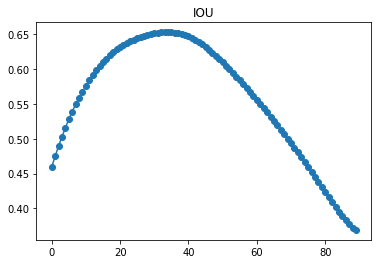

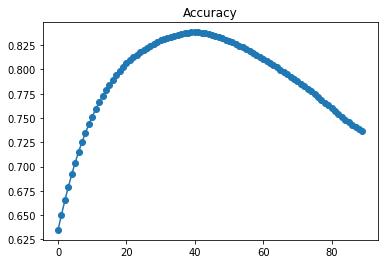

In [58]:
plt.plot(ious, "-o")
plt.title("IOU")
plt.show()

plt.plot(accuracy_scores, "-o")
plt.title("Accuracy")
plt.show()

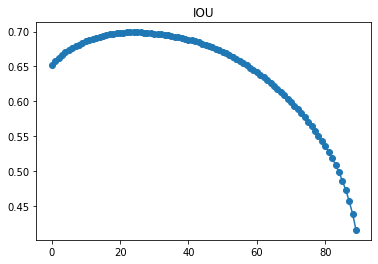

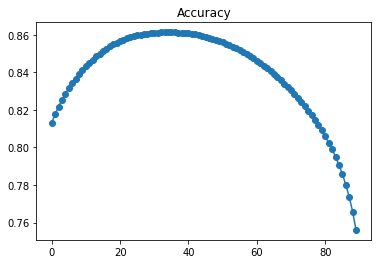

In [21]:
plt.plot(ious, "-o")
plt.title("IOU")
plt.show()

plt.plot(accuracy_scores, "-o")
plt.title("Accuracy")
plt.show()

In [59]:
metrics = pd.DataFrame(
    columns=[
        "Threshold",
        "IoU",
        "Accuracy",
    ]
)
# "F1 score", "Precision", "Recall"
metrics["IoU"] = pd.Series(ious)
metrics["Accuracy"] = pd.Series(accuracy_scores)
# metrics['F1 score'] = pd.Series(f1_scores)
# metrics['Precision'] = pd.Series(precision_scores)
# metrics['Recall'] = pd.Series(recall_scores)

metrics.Threshold = pd.Series(np.arange(0.10, 1.0, 0.01))


In [60]:
metrics.iloc[:,1:].max()        # 100 epoch 

IoU         0.652802
Accuracy    0.838342
dtype: float64

metrics.to_csv('./60epochs_metric.csv')

In [34]:
final_metrics = pd.DataFrame(
    columns=[
        "Threshold",
        "IoU",
        "Accuracy",
    ]
)
final_metrics["IoU"] = pd.Series(ious)
final_metrics["Accuracy"] = pd.Series(accuracy_scores)

final_metrics.Threshold = pd.Series(np.arange(0.10, 1.0, 0.01))

In [35]:
final_metrics.iloc[:,1:].max()      # 71 epoch

IoU         0.704687
Accuracy    0.864789
dtype: float64

In [23]:
metrics60 = pd.read_csv('60epochs_metric.csv')

In [26]:
metrics60.iloc[:,2:].max()      # 60 epoch

IoU         0.687062
Accuracy    0.857241
dtype: float64